# Will Gasser | 2/20/2025 | MNIST NN

This is a simple NN with back propogation to formalize my understanding of ML and NN concepts.

I am limiting myself to having imports: numpy, random, time (just for stats), pandas (just for data read), and matplotlib for plotting 

Let us see how fast I can complete this, oh and no LLMs for any functions, I will note if I use it for syntax.

Init commit now: 2/20/2025 @ 9:14 EST

Finish: 2/23/2025 @ 9:17 EST 

I used LLMS for math notation and used many videos for helping explain the chain rule. 
Lots of time went into figuring this out I am so ready to go back to using libraries 

In [18]:
import numpy as np
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
TRAIN_DATA = np.array(pd.read_csv('mnist_train.csv'))
TEST_DATA = np.array(pd.read_csv('mnist_test.csv'))

In [20]:
# DATA FUNCTIONS

DATA_SIZE = np.shape(TRAIN_DATA)
BATCH_INDICES = list(range(0, DATA_SIZE[0]))

def shuffle_batch() -> None:
    random.shuffle(BATCH_INDICES)
    
def get_one_example(data: np.ndarray) -> np.ndarray:
    return data 

def get_label(sample: np.ndarray) -> int:
    return int(sample[0])

def get_features(sample: np.ndarray) -> np.ndarray:
    return sample[1:][np.newaxis, :] / 255.0



In [21]:
def SIGMOID(Z: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-Z))

def SIGMOID_DERIVATIVE(a: np.ndarray) -> np.ndarray:
    return a * (1 - a)

def FORWARD_PASS(input_activation: np.ndarray, weights: list, bias: list) -> list:
    activations = [input_activation]
    a = input_activation
    for W, b in zip(weights, bias):
        z = np.dot(a, W) + b
        a = SIGMOID(z)
        activations.append(a)
    return activations

def UPDATE_PARAMETERS(weights: list, bias: list, weight_gradients: list, bias_gradients: list, learning_rate: float, batch_size: int):
    for i in range(len(weights)):
        weights[i] = weights[i] - learning_rate * (weight_gradients[i] / batch_size)
        bias[i] = bias[i] - learning_rate * (bias_gradients[i] / batch_size)
    return weights, bias

def DELTA(old_delta: np.ndarray, weights_vec: np.ndarray, activation: np.ndarray):
    return np.dot(old_delta, weights_vec.T) * SIGMOID_DERIVATIVE(activation)

def W_GRADIENT(activation_prev: np.ndarray, delta: np.ndarray) -> np.ndarray:
    return np.dot(activation_prev.T, delta)

def B_GRADIENT(delta: np.ndarray) -> np.ndarray:
    return np.sum(delta, axis=0, keepdims=True)

def STOCHASTIC_GRADIENT(activation_vectors: list, weights: list, labels: np.ndarray):
    activations_all = [np.vstack(layer) for layer in zip(*activation_vectors)]
    weight_gradients = [None] * len(weights)
    bias_gradients = [None] * len(weights)
    a_output = activations_all[-1]
    delta = (a_output - labels) * SIGMOID_DERIVATIVE(a_output)
    weight_gradients[-1] = W_GRADIENT(activations_all[-2], delta)
    bias_gradients[-1] = B_GRADIENT(delta)
    for l in reversed(range(1, len(weights))):
        delta = DELTA(delta, weights[l], activations_all[l])
        weight_gradients[l - 1] = W_GRADIENT(activations_all[l - 1], delta)
        bias_gradients[l - 1] = B_GRADIENT(delta)
    return weight_gradients, bias_gradients

def BACK_PROPOGATION(activation_vectors: list, weights: list, bias: list, learning_rate: float, batch_size: int, labels: np.ndarray):
    weight_gradients, bias_gradients = STOCHASTIC_GRADIENT(activation_vectors, weights, labels)
    weights, bias = UPDATE_PARAMETERS(weights, bias, weight_gradients, bias_gradients, learning_rate, batch_size)
    return weights, bias


In [22]:
def training(data_size: int, epochs: int, batch_size: int, learning_rate: float, data: np.ndarray, weights: list, bias: list, internal_test: bool, logs: bool) -> None:
    BATCHES = data_size // batch_size
    if logs:
        print(f'Commencing Training with:\nEpochs: {epochs}\nBatches: {BATCHES}\nBatch Size: {batch_size}')
    total_time = time.time()
    for epoch in range(epochs):
        epoch_time = time.time()
        for batch in range(BATCHES):
            labels = np.zeros((batch_size, 10))
            activation_vectors = []
            for batch_index in range(batch_size):
                sample_index = batch * batch_size + batch_index
                sample = data[sample_index]
                label = get_label(sample)
                features = get_features(sample)
                labels[batch_index, label] = 1
                activation_vectors.append(FORWARD_PASS(features, weights, bias))
            weights, bias = BACK_PROPOGATION(activation_vectors, weights, bias, learning_rate, batch_size, labels)
        if logs:
            print(f'EPOCH {epoch} complete in {time.time() - epoch_time:.2f}(s)')
            if internal_test: testing(TEST_DATA, weights, bias, logs)
    if logs:
        print(f'TRAINING COMPLETE in time: {time.time() - total_time:.2f}(s)')

def testing(data: np.ndarray, weights: list, bias: list, logs: bool):
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    correct_predictions = 0
    total_samples = len(data)
    for idx in indices:
        sample = data[idx]
        features = get_features(sample)
        actual_label = get_label(sample)
        activations = FORWARD_PASS(features, weights, bias)
        predicted_label = np.argmax(activations[-1])
        if predicted_label == actual_label:
            correct_predictions += 1
    accuracy = correct_predictions / total_samples
    if logs:
        print(f'Accuracy: {accuracy * 100:.2f}% ({correct_predictions} / {total_samples})')
        print('---------------------------------')
    return accuracy


In [23]:
'''
###################################################################
### THIS CELL SETS THE MODEL WEIGHTS/BIAS BACK TO RANDOM VALUES ###
###################################################################
'''

# MODEL INSTANTIATION

def initialize_model():
    weights784 = np.random.uniform(low=-1.0, high=1.0, size=(784, 256))
    bias256 = np.zeros((1,256))
    weights256 = np.random.uniform(low=-1.0, high=1.0, size=(256, 128))
    bias128 = np.zeros((1,128))
    weights128 = np.random.uniform(low=-1.0, high=1.0, size=(128, 64))
    bias64 = np.zeros((1,64))
    weights64 = np.random.uniform(low=-1.0, high=1.0, size=(64, 10))
    bias10 = np.zeros((1,10))
    return [weights784, weights256, weights128, weights64], [bias256, bias128, bias64, bias10]


WEIGHTS, BIAS = initialize_model()

In [24]:
# DATA PRE-PROCESSING
print(f'Data processing, shuffling batch of size {len(BATCH_INDICES)}.')
start = time.time()
shuffle_batch()
shuffle_time = time.time() - start
print(f'Data shuffling complete, took {shuffle_time:.2f} seconds.')

# TRAINING BLOCK
DATA_SIZE = len(TRAIN_DATA)
EPOCHS = 5
BATCH_SIZE = 5
LEARNING_RATE = 0.1

training(DATA_SIZE, EPOCHS, BATCH_SIZE, LEARNING_RATE, TRAIN_DATA, WEIGHTS, BIAS, True, True)


Data processing, shuffling batch of size 59999.
Data shuffling complete, took 0.02 seconds.
Commencing Training with:
Epochs: 5
Batches: 11999
Batch Size: 5
EPOCH 0 complete in 13.52(s)
Accuracy: 88.74% (8873 / 9999)
---------------------------------
EPOCH 1 complete in 14.44(s)
Accuracy: 91.92% (9191 / 9999)
---------------------------------
EPOCH 2 complete in 17.57(s)
Accuracy: 93.00% (9299 / 9999)
---------------------------------
EPOCH 3 complete in 14.93(s)
Accuracy: 93.67% (9366 / 9999)
---------------------------------
EPOCH 4 complete in 14.19(s)
Accuracy: 94.21% (9420 / 9999)
---------------------------------
TRAINING COMPLETE in time: 78.86(s)


In [26]:
# Okay let's find optimal hyper parameters, this is going to take a long time

best_lr = None
best_accuracy = 0
results = {}
DATA_SIZE = len(TRAIN_DATA)
EPOCHS = 2
BATCH_SIZE = 10 # why do I even do stochastic if I just average two, I am a perfectionist what a waste of time cry cry cry

weights, bias = initialize_model() # let's use the same model instantiation across each iteration

for lr in np.arange(0.01, 0.03, 0.01):
    test_weights, test_bias = weights, bias
    
    training(DATA_SIZE, EPOCHS, BATCH_SIZE, lr, TRAIN_DATA, test_weights, test_bias, False, False)
    acc = testing(TEST_DATA, test_weights, test_bias, False)
    results[lr] = acc
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_lr = lr
        
    print(f'Learning Rate: {lr:.2f}, Accuracy: {acc*100:.2f}%')
print(f'Our best learning rate was {best_lr:.2} with an accuracy of {best_accuracy}')

learning_rates = list(results.keys())
accuracies = [results[lr]*100 for lr in learning_rates]

Learning Rate: 0.01, Accuracy: 57.62%
Learning Rate: 0.02, Accuracy: 78.51%
Our best learning rate was 0.02 with an accuracy of 0.785078507850785


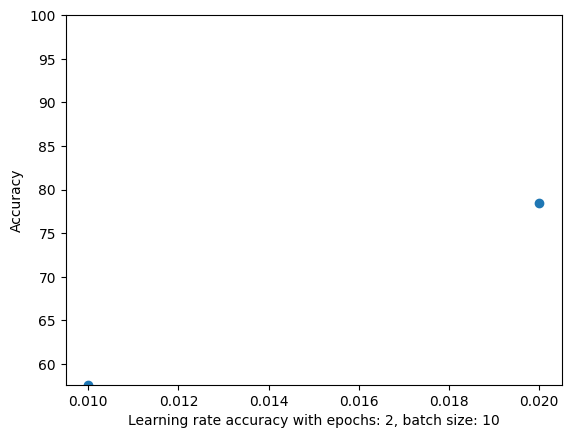

In [27]:
plt.scatter(learning_rates, accuracies)
plt.xlabel(f'Learning rate accuracy with epochs: {EPOCHS}, batch size: {BATCH_SIZE}')
plt.ylabel('Accuracy')
plt.ylim(min(accuracies), 100)
plt.show()